# **3. 분류**

# **3.1 MNIST**

**MNIST**
```
MNIST 데이터는 고등학생과 미국 인구 조사국 직원들이 손으로 쓴 70,000개 작은 숫자 이미지입니다.
각 이미지에는 어떤 숫자를 나타내는지 레이블이 되어있습니다.
이 데이터셋은 학습용으로 많이 사용됩니다.
```


## **데이터 불러오기**

In [1]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

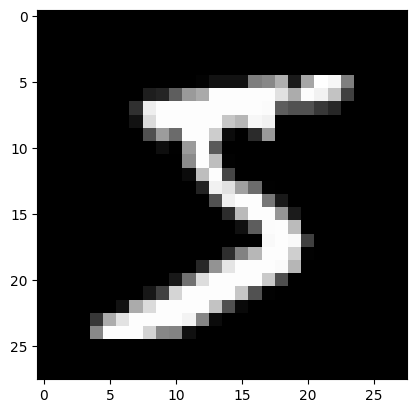

In [2]:
import matplotlib.pyplot as plt

some_digit = x_train[0]
image = some_digit.reshape(28, 28)
plt.imshow(image, cmap='gray')

In [3]:
print('타깃 레이블: {}'.format(y_train[0]))

타깃 레이블: 5


# **3.2 이진 분류기 훈련**

**이진 분류기**
```
이진 분류기는 주어진 입력 데이터를 두 개의 클래스 중 하나로 분류하는 모델입니다.
```
**이진 분류기 훈련**
```
MNIST 분류 문제를 단순화해서 하나의 숫자, 예를 들어 숫자 5만 식별해보겠습니다.
사이킷런의 SGDClassifier 클래스를 사용해 확률적 경사 하강법 분류기로 시작해보겠습니다.

+ 확률적 경사 하강법
확률적 경사 하강법은 데이터셋에서 무작위로 선택한 하나의 샘플을 이용해 모델의 파라미터를 반복적으로 업데이트하여 최적화를 수행하는 알고리즘입니다.
1. 초기화: 모델의 파라미터(예: 가중치와 편향)를 임의로 설정하여 시작합니다.
2. 샘플 선택: 데이터셋에서 임의의 한 샘플을 선택하여 학습을 진행합니다.
3. 손실 계산: 선택된 샘플에 대해 손실 함수의 값을 계산합니다.
4. 파라미터 업데이트: 계산된 기울기를 바탕으로 파라미터를 업데이트하여 학습을 진행합니다.
                      새로운 파라미터 = 기존 파라미터 - (학습률 * 기울기)
5. 반복: 샘플을 하나씩 선택하고 파라미터를 업데이트하는 과정을 여러 번 반복합니다.
6. 수렴 확인: 반복을 진행하면서 손실 값이 더 이상 크게 변하지 않으면 학습을 종료합니다.
```

In [4]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42).fit(x_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

**이진 분류기 예측**
```
분류기는 이미지 5를 나타낸다고 올바르게 추측했습니다.
그럼 모델의 성능을 평가해봅시다.
```

# **3.3 성능 측정**

**모델의 성능**
```
모델의 성능이란, 주어진 문제에 대해 모델이 얼마나 정확하게 예측을 수행하는지 또는 문제 해결을 잘하는지 평가하는 척도를 말합니다.
성능 평가는 보통 모델의 예측 결과를 실제 결과와 비교하여 다양한 지표를 통해 측정됩니다.
```

## **3.3.1 교차 검증을 사용한 정확도 측정**

**교차 검증**
```
교차 검증은 모델의 성능을 평가하고, 과적합을 방지하기 위해 데이터셋을 여러 개의 서브셋으로 나누어 모델을 여러 번 학습하고 평가하는 방법입니다.
이를 통해 모델이 특정 데이터에만 잘 맞추어지는 것이 아니라, 일반화 능력이 뛰어난지 확인할 수 있습니다.

k-폴드 교차 검증은 훈련 세트를 k개의 폴드(서브셋)로 나누고, 평가를 위해 매번 다른 폴드를 떼어놓고 훈련하는 방식입니다.
cross_val_score 함수로 폴드가 3개인 k-폴드 교차 검증을 사용해 SGDClassifier를 평가해보겠습니다.
```

In [6]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

**교차 검증 결과**
```
모든 교차 검증에 대해 **정확도**가 95%입니다.
가장 많이 등장하는 클래스('5'가 아님)로 분류하는 더미 분류기를 만들어 비교해보겠습니다.

+ 더미 분류기
더미 분류기는 실제 모델을 훈련시키기 전에 성능을 비교하기 위해 사용되는 아주 간단한 기준 모델입니다.
주로 다른 복잡한 모델들과 비교하기 위해 사용되며, 대부분의 경우
1. 무작위 예측
2. 가장 빈도가 높은 클래스 예측
3. 평균/중앙값 예측
등의 단순한 규칙에 기반합니다.
```

In [7]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier().fit(x_train, y_train_5)
print('{}: 즉, True로 예측된 것이 없습니다'.format(any(dummy_clf.predict(x_train))))
cross_val_score(dummy_clf, x_train, y_train_5, cv=3, scoring='accuracy')

False: 즉, True로 예측된 것이 없습니다


array([0.90965, 0.90965, 0.90965])

**더미 분류기의 결과**
```
이미지의 10% 정도만 숫자 5이기 때문에 무조건 '5 아님'으로 예측하면 정확히 맞출 확률이 90%입니다.
이 예제는 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유를 보여줍니다.
특히 불균형한 데이터셋을 다룰 더욱 그렇습니다.
```

## **3.3.2 오차 행렬**

**오차 행렬**
```
오차 행렬은 분류 모델의 성능을 평가하기 위한 도구로, 모델이 예측한 결과와 실제 값의 관계를 나타내는 표입니다.
주로 이진 분류나 다중 클래스 분류에서 사용되며, 모델이 얼마나 잘 예측했는지, 어떤 종류의 오류가 발생했는지를 시각적으로 보여줍니다.

오차 행렬의 아이디어 모든 A/B 쌍에 대해 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것입니다.
예를 들어 분류기가 숫자 8의 이미지를 0으로 잘못 분류한 횟수를 알고 싶다면 오차 행렬에서 8번 행 / 0번 열을 보면 됩니다.
```


In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [9]:
# 완벽한 분류기
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

**오차 행렬 결과**
```
오차 행렬의 행은 실제 클래스를 나타내고 열은 예측한 클래스를 나타냅니다.
TN - FP
|    |
FN - TP
True Positive (TP):  모델이 양성 클래스로 예측했고, 실제로도 양성 클래스인 샘플의 수입니다.
False Negative (FN): 모델이 음성 클래스로 예측했지만, 실제로는 양성 클래스인 샘플의 수입니다.
False Positive (FP): 모델이 양성 클래스로 예측했지만, 실제로는 음성 클래스인 샘플의 수입니다.
True Negative (TN):  모델이 음성 클래스로 예측했고, 실제로도 음성 클래스인 샘플의 수입니다.

오차 행렬이 많은 정보를 제공해주지만 가끔 더 요약된 지표가 필요할 때가 있습니다.
```

## **3.3.3 정밀도와 재현율**

**정밀도**
```
정밀도는 모델이 양성으로 예측한 것 중에서 실제로 양성인 것의 비율을 나타냅니다.
즉, 모델이 양성 클래스를 예측했을 때, 그 예측이 얼마나 정확한지를 측정합니다.
```
$$정밀도 = \frac{TP}{TP + FP}$$

**재현율**
```
재현율은 실제로 양성인 샘플 중에서 모델이 양성으로 정확하게 예측한 비율을 나타냅니다.
즉, 모델이 실제 양성을 얼마나 잘 찾는지 측정합니다.
```
$$재현율 = \frac{TP}{TP + FN}$$

**F1 점수**
```
F1 점수는 분류 모델의 성능을 평가하는 지표 중 하나로, 정밀도와 재현율의 조화 평균입니다.
F1 점수는 정밀도와 재현율을 균형 있게 고려하여, 두 지표가 모두 중요한 상황에서 모델 성능을 평가할 수 있게 도와줍니다.

+ 조화 평균의 특성
조화평균은 낮은 값에 훨씬 더 높은 비중을 둡니다.
결과적으로 F1 점수가 높아지려면 정밀도와 재현율 모두 높아야 합니다.
```
$$F_{1} = \frac{2}{\frac{1}{정밀도} + \frac{1}{재현율}} = 2\cdot\frac{정밀도\cdot재현율}{정밀도 + 재현율} = \frac{TP}{TP + \frac{FN + FP}{2}}$$

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

ps = precision_score(y_train_5, y_train_pred)
rs = recall_score(y_train_5, y_train_pred)
f1s = f1_score(y_train_5, y_train_pred)
print('precision_score: \t{}'.format(ps))
print('recall_score: \t\t{}'.format(rs))
print('f1_score: \t\t{}'.format(f1s))

precision_score: 	0.8370879772350012
recall_score: 		0.6511713705958311
f1_score: 		0.7325171197343847


## **3.3.4 정밀도/재현율 트레이드오프**

**정밀도/재현율 트레이드오프**
```
정밀도와 재현율이 비슷한 분류기에서는 F1 점수가 높습니다.
하지만 상황에 따라 정밀도가 중요할 수도 있고 재현율이 중요할 수도 있습니다.
정밀도와 재현율은 모두 얻을 수 없습니다.
이처럼 정밀도와 재현율이 상충 관계에 있는 것을 정밀도/재현율 트레이드오프라고 합니다.
```

**결정 임계값**
```
결정 임계값은 이진 분류 모델에서 예측 확률을 기반으로 어떤 클래스에 속할지 결정하는 기준값입니다.
모델이 출력하는 예측 확률에 따라, 이 확률이 임계값보다 크면 하나의 클래스를, 작으면 다른 클래스를 예측하는 방식으로 결정됩니다.
임계값을 높이면 정밀도가 높아지고 반대로 내리면 재현율이 올라갑니다.
```

In [11]:
y_scores = sgd_clf.decision_function([some_digit])
print('decision_function 예측 점수: {}'.format(y_scores))

threshold = 0
y_some_digit_pred = (y_scores > threshold)
print('임계값이 0일 때: \t{}'.format(y_some_digit_pred))
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
print('임계값이 3000일 때: \t{}'.format(y_some_digit_pred))

decision_function 예측 점수: [2164.22030239]
임계값이 0일 때: 	[ True]
임계값이 3000일 때: 	[False]


**임계값을 고르는 방법**

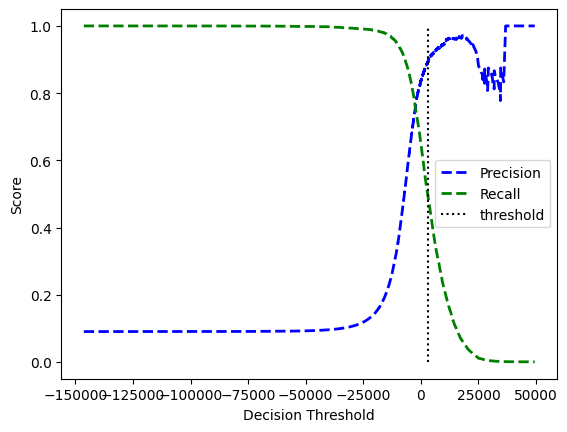

In [12]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,
                             method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g--', label='Recall', linewidth=2)
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label='threshold')
plt.ylabel('Score')
plt.xlabel('Decision Threshold')
plt.legend(loc='best')

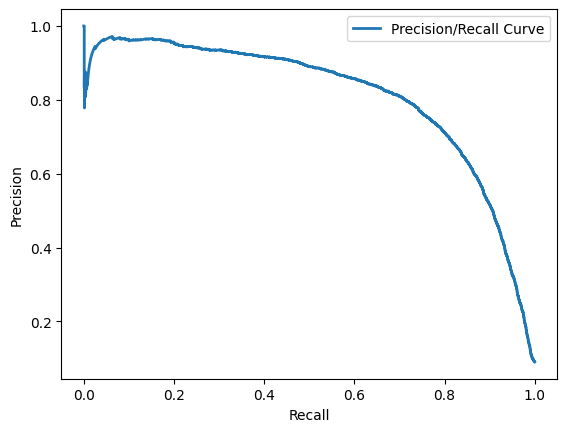

In [13]:
plt.plot(recalls, precisions, linewidth=2, label='Precision/Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')

In [14]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print('정밀도가 최소 90%가 되는 가장 낮은 임계값: {}'.format(threshold_for_90_precision))

y_train_pred_90 = (y_scores >= threshold_for_90_precision)
ps = precision_score(y_train_5, y_train_pred_90)
rp = recall_score(y_train_5, y_train_pred_90)
print('precision_score: \t{}'.format(ps))
print('recall_at_90_precision: {}'.format(rp))

정밀도가 최소 90%가 되는 가장 낮은 임계값: 3370.0194991439557
precision_score: 	0.9000345901072293
recall_at_90_precision: 0.4799852425751706


## **3.3.5 ROC 곡선 (수신기 조작 특성)**

**ROC 곡선**
```
ROC 곡선은 분류 모델의 성능을 평가하는 그래프입니다.
이 곡선은 재현율(TPR) / 거짓 양성 비율(FPR) = 1 - 특이도(TNR)의 관계를 시각적으로 나타냅니다.
ROC 곡선은 모델의 결정 임곗값을 변화시킬 때, 모델이 어떻게 성능을 변화시키는지 보여주며, 이진 분류 문제에서 주로 사용됩니다.

+ 특이도
특이도는 이진 분류에서 음성 클래스를 얼마나 잘 식별하는지를 나타내는 지표입니다.
즉, 실제로 음성인 샘플을 모델이 얼마나 정확하게 음성으로 분류했는지를 평가하는 지표입니다.

+ 곡선 아래 면적 (AUC)
완벽한 분류기는 ROC의 AUC가 1이고, 완전한 랜덤 분류기는 0.5입니다.
```

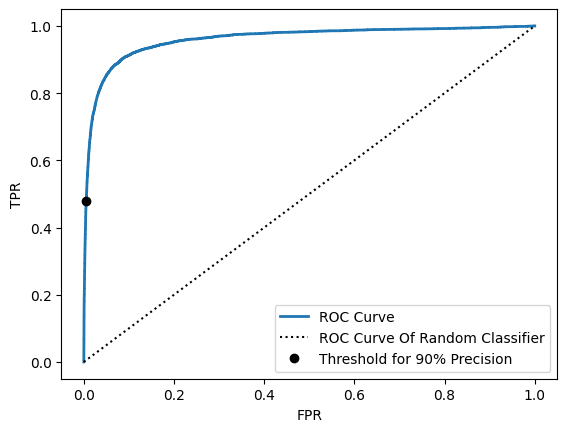

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k:', label='ROC Curve Of Random Classifier')
plt.plot([fpr_90], [tpr_90], 'ko', label='Threshold for 90% Precision')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc='best')

**AUC 비교하기**
```
RandomForestClassifier와 SGDClassifier 클래스를 사용해 AUC를 비교해보겠습니다.
```

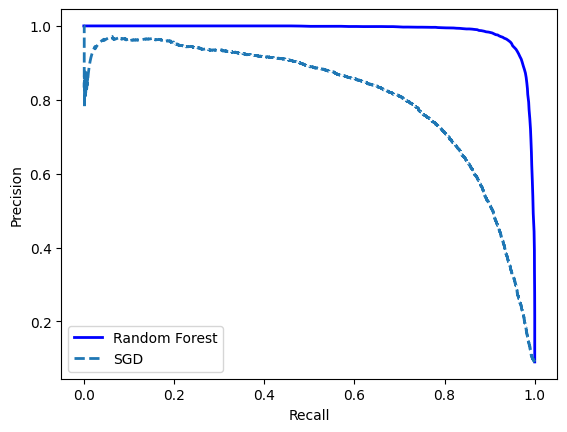

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,
                                    method='predict_proba')
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2,
         label='Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label='SGD')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')

In [17]:
from sklearn.metrics import roc_auc_score

y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1s = f1_score(y_train_5, y_train_pred_forest)
rs = roc_auc_score(y_train_5, y_scores_forest)
print('RandomForest')
print('rf_f1_score: {}'.format(f1s))
print('rf_auc_score: {}'.format(rs))

f1s = f1_score(y_train_5, y_train_pred)
rs = roc_auc_score(y_train_5, y_scores)
print('\nSGDClassifier')
print('SGD_f1_score: {}'.format(f1s))
print('SGD_auc_score: {}'.format(rs))

RandomForest
rf_f1_score: 0.9274509803921569
rf_auc_score: 0.9983436731328145

SGDClassifier
SGD_f1_score: 0.7325171197343847
SGD_auc_score: 0.9604938554008616


**AUC 비교 결과**
```
RandomForestClassifier의 PR 곡선이 SGDClassifier의 곡선보다 훨씬 더 오른쪽 모서리에 가깝습니다.
F1 점수와 ROC AUC 점수도 더 우수합니다.
```

# **3.4 다중 분류**

**다중 분류기**
```
다중 분류기는 세 개 이상의 클래스로 데이터를 분류하는 기계 학습 모델을 의미합니다.
이진 분류 모델은 두 개의 클래스를 예측하는 데 반해, 다중 분류는 세 개 이상의 클래스를 다룹니다.
sklearn.svm.SVC 클래스를 사용해 서포트 벡터 머신 분류기를 테스트해보겠습니다.

+ OvR 또는 OvA
OvR 방식에서는 N개의 이진 분류기를 학습하고 각 분류기의 예측된 클래스의 확률값을 비교하여 가장 높은 확률을 가진 클래스를 최종 예측으로 선택합니다.
사이킷런에서는 OneVsRestClassifier를 사용하여 강제할 수 있습니다.

+ OvO
OvO 방식에서는, 각 클래스의 모든 쌍을 비교하여 이진 분류기를 학습합니다.
N개의 클래스가 있을 경우, N(N-1)/2개의 이진 분류기가 학습됩니다.
사이킷런에서는 OneVsOneClassifier를 사용하여 강제할 수 있습니다.
```

In [18]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42).fit(x_train[:2000], y_train[:2000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [19]:
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores.round(2))
print('가장 높은 점수 Class: {}'.format(some_digit_scores.argmax()))

[[ 3.79  0.73  6.06  8.3  -0.29  9.3   1.75  2.77  7.21  4.82]]
가장 높은 점수 Class: 5


# **3.5 오류 분석**

**모델의 성능을 향상시키는 법**
```
1. 데이터 준비 단계에서 가능한 선택 사항 탐색
2. 여러 모델을 시도
3. GridSearchCV를 사용해 하이퍼파라미터를 세밀하게 튜닝
4. 오류의 종류 분석
```

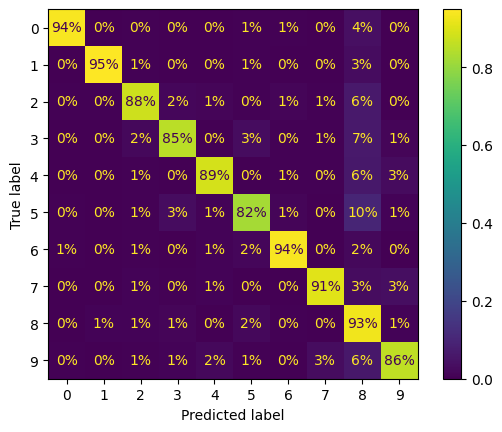

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize='true', values_format='.0%')

**오류 종류 분석**
```
이제 5 이미지의 82%만이 올바르게 분류되었다는 것을 쉽게 알 수 있습니다.
모델이 5 이미지에서 가장 많이 범한 오류는 8로 잘못 분류한 것입니다.

오차 행렬을 분석하면 분류기의 성능 향상 방안에 관한 인사이트를 얻을 수 있습니다.
예를 들어 동심원의 수를 세는 알고리즘을 작성한다(8은 2개, 6은 1개, 5는 0개).

+ 데이터 증식
데이터 증식은 주어진 데이터셋의 크기를 인위적으로 늘리기 위한 기술입니다.
이는 기존의 데이터를 변형하거나 조작하여 새로운 학습 샘플을 생성하는 과정입니다.
데이터 증식은 모델의 일반화 능력을 향상시키고 과적합을 방지하는 데 도움을 줍니다.
```

# **3.6 다중 레이블 분류**

**다중 레이블 분류**
```
다중 레이블 분류는 각 데이터 샘플에 대해 여러 개의 클래스가 동시에 적용될 수 있는 분류 문제를 의미합니다.
즉, 각 샘플은 하나의 클래스에 속하는 것이 아니라, 여러 클래스에 속할 수 있습니다.

+ ClassifierChain
Classifier Chain은 레이블 간의 의존성을 고려하여 성능을 향상시키는 방법입니다.
각 레이블을 이진 분류기로 처리하는 기본적인 다중 레이블 분류에서,
레이블 간의 의존성을 반영하여 각 레이블에 대한 예측 결과를 다음 레이블의 예측에 입력으로 사용하는 방식입니다.
```

In [21]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier().fit(x_train, y_multilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [22]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3)
f1s = f1_score(y_multilabel, y_train_knn_pred, average='macro')
print('f1_score: {}'.format(f1s))

f1_score: 0.9764102655606048


In [23]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42).fit(x_train[:2000], y_multilabel[:2000])
chain_clf.predict([some_digit])

array([[0., 1.]])

# **3.7 다중 출력 분류**

**다중 출력 분류**
```
다중 출력 분류는 하나의 입력 데이터에 대해 여러 개의 출력 값을 예측하는 문제를 말합니다.
일반적인 분류 문제는 하나의 입력에 대해 하나의 클래스만 예측하지만, 다중 출력 분류에서는 입력 하나에 대해 여러 개의 클래스가 동시에 예측됩니다.
이를 설명하기 위해 이미지에서 잡음을 제거하는 시스템을 만들어보겠습니다.
```

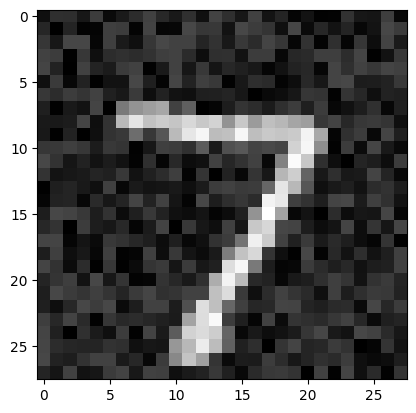

In [24]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
x_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

image = x_test_mod[0].reshape(28, 28)
plt.imshow(image, cmap='gray')

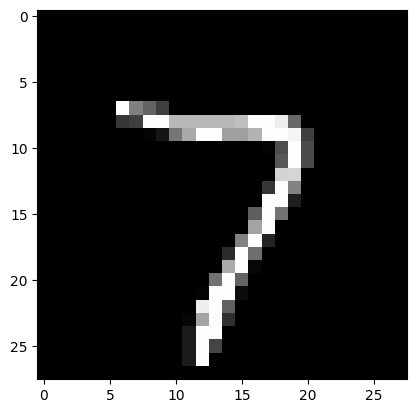

In [25]:
knn_clf = KNeighborsClassifier().fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[0]])
image = clean_digit.reshape(28, 28)
plt.imshow(image, cmap='gray')